# PARAMETERS AND ***IMPORTS***

In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt
import itertools
import random
import time

def random_permutation(iterable, r=None):
    "Random selection from itertools.permutations(iterable, r)"
    pool = tuple(iterable)
    r = len(pool) if r is None else r
    return tuple(random.sample(pool, r))
    
inn = 'inn'
out = 'out'

N = 'N'
S = 'S'
W = 'W'
E = 'E'

# ***HELPER FUNCTIONS OR METHODS***

In [ ]:
def gen(Lot):                                                                   #RETURNS THE GENERATORS OF A LOT IN A LIST
	gens = []
	# for item in Lot:
	# 	for label in item:
	# 		if label not in gens:
	# 			gens.append(label)
	counter = 1
	for i in range(len(Lot)+1):
		gens.append(counter)
		counter+=1


	return gens
#----------------------------------------------------------------------------------------------
def getVertices(Lot):                                                           #GETS THE VERTICES OF THE LINK OF A LOT (PRES COMPLEX)
	gens = gen(Lot)

	vertices = []

	for item in gens:
		vertices.append((item, inn))
		vertices.append((item, out))

	return vertices
#----------------------------------------------------------------------------------------------
def getEdges(Lot):
  edgeList = []
  for square in Lot:
    edgeList.append(((square[0], inn), (square[1], out)))
    edgeList.append(((square[0], out), (square[1], out)))
    edgeList.append(((square[1], inn), (square[2], out)))
    edgeList.append(((square[1], inn), (square[2], inn)))

  return edgeList
#----------------------------------------------------------------------------------------------
def link(Lot):                                                                  #CREATES THE LINK OF A LOT, 
	J = nx.MultiGraph()                                                           #IT IS STORED AS A MULTIDIGRAPH IN NETWORKX
	vertices = getVertices(Lot)
	for item in vertices:
		if item[1] == inn:
			J.add_node(item)
		if item[1] == out:
			J.add_node(item)

	for square in Lot:
		J.add_edge((square[0], inn), (square[1], out))
		J.add_edge((square[0], out), (square[1], out))
		J.add_edge((square[1], inn), (square[2], out))
		J.add_edge((square[1], inn), (square[2], inn))

	return J
#----------------------------------------------------------------------------------------------
def Ord(s, M):
	return M.index(s)		

# ***RECURSIVE FUNCTION TO COLLAPSE A NETWORKX GRAPH***

In [ ]:
def collapse(J):                                                                #A RECURSIVE ALGORITHM THAT COLLAPSES A GRAPH UNTIL 
  if len(list(J.edges())) == 0:                                                 #THERE ARE MERELY VERTICES IN THE GRAPH, OR
    return J                                                                    #COLLAPSES A GRAPH UNTIL IT CANNOT BE COLLAPSED
  
  J_col = J.copy()                                                              #IM PRETTY SURE IT WORKS, BUT I DON'T TRUST MYSELF
  nodeList = list(J_col.degree(J_col.nodes()))
  
  for node in nodeList:                                                         #IT SEARCHES FOR VERTICES OF DEGREE ONE, THEN DELETES 
    if node[1] == 1:                                                            #THE UNIQUE EDGE CONNECTING TO ANOTHER VERTEX
      neighbor = list(J.neighbors(node[0]))
      if J_col.has_edge(neighbor[0], node[0]):
        J_col.remove_edge(neighbor[0], node[0])
      if J_col.has_edge(node[0], neighbor[0]):
        J-col.remove_edge(node[0], neighbor[0])
  if len(list(J_col.edges())) == len(list(J.edges())):
    return J
  else:
    return collapse(J_col)

def removeZeroNodes(G):                                                         #There was a connectivity problem if
  nodeList = list(G.degree(G.nodes()))                                          #zero nodes were left in the graph
  for node in nodeList:
    if node[1] == 0:
      G.remove_node(node[0])                                                    #Removes all degree zero vertices
  return G


In [ ]:
#TESTING COLLAPSE
#Seems good?

#G = nx.path_graph(7)
#lot = [[1,3,2],[2,4,3],[3,1,4]]
lot = [[1,3,2], [2,1,3], [1,2,4], [5,4,1]]

G = link(lot)
print(len(list(G.edges())))
print(len(list(collapse(G).edges())))

16
13


# ***THE BLOCK BELOW HAS BEEN IMPORTED FROM THE OTHER CODE***

In [ ]:
def selection(choice, square):
		if choice == N:
			return(square[1])
		if choice == S:
			return(square[1])
		if choice == E:
			return(square[2])
		if choice== W:
			return(square[0])

#----------------------------------------------------------------------------------------------
def injective(bridgechoice,lot):                                                #This can be sped up
	for x in range(0,len(bridgechoice)):
		for y in range(x+1 ,len(bridgechoice)):
			if selection(bridgechoice[x],lot[x])  == selection(bridgechoice[y],lot[y]):
				return False
	return True  #this happens if there wasn't a false returned earlier...

#----------------------------------------------------------------------------------------------
def strip(J, U):																																#Takes input a graph (and a set U of a few vertices we want to keep track of),
	J_stripped = J.copy() 																												#searches for edges having a degree 1 vertex (on either side)                              
	nodeList = list(J.degree(J.nodes()))																					#and removes those edges but keeps the vertices
	for i in range(len(nodeList)):																								#Repeats this until no edges have been removed. Returns the result:
		if nodeList[i][1] == 1:
			nodeNeighbor = list(J.neighbors(nodeList[i][0]))
			if nodeNeighbor[0] != nodeList[i][0]:

				if J_stripped.has_edge(nodeNeighbor[0], nodeList[i][0]):
					J_stripped.remove_edge(nodeNeighbor[0], nodeList[i][0])
				if J_stripped.has_edge(nodeList[i][0], nodeNeighbor[0]):
					J_stripped.remove_edge(nodeList[i][0], nodeNeighbor[0])
	return (J_stripped, U)

#----------------------------------------------------------------------------------------------
def Ord(s, M):																																	#this will allow us to compare two elements of K with 
	return M.index(s)																															#respect to some ordering M of K

#----------------------------------------------------------------------------------------------
#if some element of cycle or dumbell has a minimal vertex with +1 charge
#then return false else return true
#Enumerating all cycles and dumbells is not an efficient way to do this:
#Instead for each vertex v in K  (which is the vertex set of link)
#and such that v has charge +1, we try to form a "generalized cycle" above v as follows:.
#Let  S < link be the full subgraph where the vertices s of S satisfy s>= v. 
#(so S consists of all vertices at least as high as v, and all edges between them)
#Repeat the following:
#Remove ALL edges that have a degree 1 endpoint. 
#if deg(v)< 2 at some stage, then Return True (that +1 vertex is good)
#Otherwise, the process terminates (at a subgraph where deg(v)>1) and Return False.
#the following is repeated from above
def vertexcheck(bridgechoice, charge, M, lot):
	G = link(lot)
	L = gen(lot)
	for i in range(len(L)):
		if charge[i] == 1:
	 		x = (L[i],inn)
		if charge[i] == -1:
	 		x = (L[i],out)

		higherList = []
		for node in list(G.nodes()):																								#let J be  the induced subgraph of link having 
			if Ord(node, M) >= Ord(x, M):																							#vertices s  with  Ord(s,M) >= Ord(x,M)
				higherList.append(node)
		G_sub = G.subgraph(higherList)

		(S,x) = strip(G_sub,x)
		if S.degree(x) != 0: 
			return False         #CHECK THIS
	return True

#----------------------------------------------------------------------------------------------
def CriticalEdge(compass,sign,square):																					#returns an ordered pair.
	if (compass,sign)== (N,-1): 																									#The first element is the critical vertex the entire pair is the critical edge.
		return  ((selection(N,square), inn),(selection(E,square),inn))
	if (compass,sign)== (N,+1):
		return ((selection(N,square),out),(selection(W,square),inn))
	if (compass,sign)== (S,-1): 
		return ((selection(S,square),inn),(selection(E,square),out))
	if (compass,sign)==(S,+1): 
		return ((selection(S,square),out),(selection(W,square),out))
	if (compass,sign)==(E,-1): 
		return ((selection(E,square),inn),(selection(N,square),inn))
	if (compass,sign)==(E,+1): 
		return ((selection(E,square),out),(selection(S,square),inn))
	if (compass,sign)==(W,-1): 
		return ((selection(W,square),inn),(selection(N,square),out))
	if (compass,sign)==(W,+1): 
		return ((selection(W,square),out),(selection(S,square),out))

# I THINK THIS WAS INCORRECT ( I reversed  the signs in the if clause)
#def CriticalEdge(compass,sign,square):																					#returns an ordered pair.
#	if (compass,sign)== (N,+1): 																									#The first element is the critical vertex the entire pair is the critical edge.
#		return  ((selection(N,square), inn),(selection(E,square),inn))
#	if (compass,sign)== (N,-1):
#		return ((selection(N,square),out),(selection(W,square),inn))
#	if (compass,sign)== (S,+1): 
#		return ((selection(S,square),inn),(selection(E,square),out))
#	if (compass,sign)==(S,-1): 
#		return ((selection(S,square),out),(selection(W,square),out))
#	if (compass,sign)==(E,+1): 
#		return ((selection(E,square),inn),(selection(N,square),inn))
#	if (compass,sign)==(E,-1): 
#		return ((selection(E,square),out),(selection(S,square),inn))
#	if (compass,sign)==(W,+1): 
#		return ((selection(W,square),inn),(selection(N,square),out))
#	if (compass,sign)==(W,-1): 
#		return ((selection(W,square),out),(selection(S,square),out))

#----------------------------------------------------------------------------------------------
#takes input : link(Lot), bridgechoice= a choice of NSEW for each square, charge=a choice of +1 or -1 for each element of L,  M = an ordering of K,  Lot under investigation)
def edgecheck(bridgechoice,charge,M,lot):
	G = link(lot)
	L = gen(lot)
# follows variant of procedure in check(link, bridgechoice, charge, M)
# difference is that there is a "critical" edge at the bottom
	for i in range(len(lot)):
			(x,y) = CriticalEdge(bridgechoice[i],charge[L.index(selection(bridgechoice[i], lot[i]))], lot[i])        
			#charge[blaah] refers to the correct index in the charge list for the associated generator
			#I was confused about this logical turn. 
		
			if Ord(x,M)<Ord(y,M):
			#
			# Instead, it should only perform the test if y  is (k,inn) and charge(k)=-1 or  y is (k,out) and charge(k)=+1  where charge(gen) means charge(lookup_position_in_list(gen)) ...


			#if Ord(y,M)<Ord(x,M) in the order then there is nothing to check and a True is returned.
			# we can omit this to save a logic step in the programming, or keep it to make the program faster.
			#let J be  the induced subgraph of link having vertices s  with  Ord(s,M) >= Ord(x,M)
			#create the subgraph s.t. every vertex in link >= x is in subgraph
			#repeatedly remove edges having a degree 1 vertex until cannot anymore 
			#	if valence(x)<2 or valence(y) < 2 return True
			#    else return False
				#repeatedly remove edges having a degree 1 vertex until cannot anymore 
			#	if valence(x)<2 or valence(y) < 2 return True
			#    else return False
				higherList = []
				for node in list(G.nodes()):
					if Ord(node, M) >= Ord(x, M):   #add all vertices higher than either vertex of the critical edge 
						higherList.append(node)
				G_sub = G.subgraph(higherList)	
				(S,[x,y]) = strip(G,[x,y])
				if S.degree(x) != 0 and S.degree(y) != 0:
					return False
	
	return True


#IMPORTANT
#selection(bridgechoice[i], lot[i]) is a generator then get charge from there
#charge[L.index(selection(bridgechoice[i], lot[i]))]
#----------------------------------------------------------------------------------------------
#Builder functions for complete lists of charges and bridges
#Definitely could be done better
def chargeBuilder(lot):
	chargeList = []
	length = len(lot)
	charges = [1,-1]
	if length == 2:
		for i in charges:
			for j in charges:
				for k in charges:
					charge = [i,j,k]
					chargeList.append(charge)
	if length == 3:
		for i in charges:
			for j in charges:
				for k in charges:
					for l in charges:
						charge = [i,j,k,l]
						chargeList.append(charge)
	if length == 4:
		for i in charges:
			for j in charges:
				for k in charges:
					for l in charges:
						for m in charges:
							charge = [i,j,k,l,m]
							chargeList.append(charge)
	if length == 5:
		for i in charges:
			for j in charges:
				for k in charges:
					for l in charges:
						for m in charges:
							for n in charges:
								charge = [i,j,k,l,m,n]
								chargeList.append(charge)
	return(chargeList)

def bridgeBuilder(lot):
	bridgeList = []
	length = len(lot)
	bridges = [N,S,E,W]
	if length == 2:
		for i in bridges:
			for j in bridges:
				bridge = [i,j]
				bridgeList.append(bridge)
	if length == 3:
		for i in bridges:
			for j in bridges:
				for k in bridges:
					bridge = [i,j,k]
					bridgeList.append(bridge)
	if length == 4:
		for i in bridges:
			for j in bridges:
				for k in bridges:
					for l in bridges:
						bridge = [i,j,k, l]
						bridgeList.append(bridge)
	if length == 5:
		for i in bridges:
			for j in bridges:
				for k in bridges:
					for l in bridges:
						for m in bridges:
							bridge = [i,j,k,l,m]
							bridgeList.append(bridge)		
	return(bridgeList)

def drawGraph(graph):
	pos = nx.spring_layout(G)
	nx.draw(G, pos)
	#edge_labels=dict([(u,v) for u,v in G.edges()])
	#nx.draw_spring(G, pos, label_pos=0.3, font_size=7)
	#nx.draw_spring(G)
	plt.show()
 
# lot = [[1,2,3], [3,1,4], [1,4,2]]
# G = link(lot)
# drawGraph(G)

#----------------------------------------------------------------------------------------------
def injectiveBridgeBuilder(lot):																											#For a lot, builds list of all injective bridge choices
	injectiveBridgeList = []
	bridgeList = bridgeBuilder(lot)
	for bridge in bridgeList:
		if injective(bridge, lot):
			injectiveBridgeList.append(bridge)
	 
	return injectiveBridgeList


# ***EVERYTHING SEEMS LIKE IT WORKS UP UNTIL NOW,***

# THE MAIN METHOD WILL BE AFTER THIS TEXT BUBBLE!


In [ ]:
#THIS IS a sAVED ALMOST WORKING VERSION, I want to keep it, just in case...
def spurlessSubs1(G):                                                            #Creates an undirected graph of our MultiDiGraph
  G.to_undirected()
  G.save = G.copy()
  G_col = collapse(G)                                                           #Collapses and removes zero nodes from base graph
  G_save = G_col.copy()

  G_col.remove_edges_from(list(G_save.edges()))
  weightedEdges = []
  weight=0
  for edge in list(G_save.edges()):
    newEdge = (edge[0], edge[1], weight)
    weightedEdges.append(newEdge)
    weight+=1
  G_col.add_weighted_edges_from(weightedEdges)
  print(G_col.edges.data('weight'))
  G_col = removeZeroNodes(G_col)
  

  subList = []
  S = [G.subgraph(c).copy() for c in nx.connected_components(G_col)]

  for component in S:
    subList.append(component.edges())

  for edgeList in subList:                                                      #We store the edge lists of connected spurless subgraphs in subList
    for edge in edgeList:                                                       #So for each item in edgeList, we initialize a graph with nodes from
      J = nx.MultiGraph()                                                       #Our original graph, and edges from the specified edgeList
      J.add_nodes_from(G_col)
      J.add_edges_from(edgeList)

      J.remove_edge(*edge)
      J_col = collapse(J).copy()                                                #Then for every edge in the specified edgeList, we remove the edge
      J_col = removeZeroNodes(J_col)                                            #And then collapse our graph. 

      components = [G.subgraph(c).copy() for c in nx.connected_components(J_col)]
      for component in components:
        weightList = []
        for edge in component.edges.data('weight'):
          weightList.append(edge[2])
        if len(list(component.edges())) > 0:
          if weightList not in superWeightList:
            subList.append(list(component.edges()))

  return subList

In [ ]:
def spurlessSubsOBSOLETE(G):                                                            #Creates an undirected graph of our MultiDiGraph
  G.to_undirected()
  #G.save = G.copy()
  G_col = collapse(G)                                                           #Collapses and removes zero nodes from base graph
  G_save = G_col.copy()

  G_col.remove_edges_from(list(G_save.edges()))
  weightedEdges = []
  weight=0                                                                      #We remove all edges from our graph
  for edge in list(G_save.edges()):                                             #And we restore all edges to our graph, but now they are weighted
    newEdge = (edge[0], edge[1], weight)                                        #With unique weights
    weightedEdges.append(newEdge)
    weight+=1
  G_col.add_weighted_edges_from(weightedEdges)
  print(G_col.edges.data('weight'))
  print(G_save.edges.data('weight'))
  G_col = removeZeroNodes(G_col)
  print(G_col.edges.data('weight'))
  

  subList = []
  superWeightList = []
  for c in nx.connected_components(G_col):
    print(list(G.subgraph(c).edges.data('weight')))
  S = [G.subgraph(c).copy() for c in nx.connected_components(G_col)]            #We split our collapsed graph into its components
  print(S)

  for component in S:                                                           #For each component, we add the weights of the graph to our
    print(component.edges.data('weight'))
    componentWeights = []                                                       #List of lists of weights, and we add all edges to our list of lists of edges 
    for edge in component.edges.data('weight'):
      componentWeights.append(edge[2])
      print(edge[2])
    superWeightList.append(componentWeights)
    subList.append(component.edges.data('weight'))

  for edgeList in subList:                                                      #We store the edge lists of connected spurless subgraphs in subList
    for edge in edgeList:                                                       #So for each item in edgeList, we initialize a graph with nodes from
      J = nx.MultiGraph()                                                       #Our original graph, and edges from the specified edgeList
      J.add_nodes_from(G_col)                                                   #However, each time we remove an edge from our edgeList, and collapse the graph
      edgeToGraph = list(edgeList)
      edgeToGraph.remove(edge)                                                  #edgeToGraph is the list of uncollapsed edges we want to see changing each iteration
      J.add_weighted_edges_from(edgeToGraph)

      J_col = collapse(J).copy()
      J_col = removeZeroNodes(J_col) 

      components = [J_col.subgraph(c).copy() for c in nx.connected_components(J_col)]
      for component in components:
        weightList = []
        for edge in component.edges.data('weight'):                             #Again, each iteration we split our graph into its components
          weightList.append(edge[2])                                            #We store the edges in the list of lists of edges, and diddo with the weights
        if len(list(component.edges())) > 0:
          if weightList not in superWeightList:
            superWeightList.append(weightList)
            #print(weightList)
            subList.append(component.edges.data('weight'))
  #print(superWeightList)
  return subList

In [ ]:
def spurlessSubs(G):
  G.to_undirected()
  G.save = G.copy()
  G_col = collapse(G)                                                           #Collapses and removes zero nodes from base graph
  G_save = G_col.copy()

  # G_col.remove_edges_from(list(G_save.edges()))
  # weightedEdges = []
  # weight=0                                                                      #We remove all edges from our graph
  # for edge in list(G_save.edges()):                                             #And we restore all edges to our graph, but now they are weighted
  #   newEdge = (edge[0], edge[1], weight)                                        #With unique weights
  #   weightedEdges.append(newEdge)
  #   weight+=1
  # G_col.add_weighted_edges_from(weightedEdges)

  #print(G_col.edges.data('weight'))
  G_col = removeZeroNodes(G_col)
  #print(G_col.edges.data('weight'))
  

  subList = []
  superWeightList = []
  S = [G.subgraph(c).copy() for c in nx.connected_components(G_col)]            #We split our collapsed graph into its components

  weight = 0
  for component in S:
    componentWeightedEdges = []
    component_Save = component.copy()
    for edge in list(component.edges()):
      newEdge = (edge[0], edge[1], weight)
      componentWeightedEdges.append(newEdge)
      #print(newEdge)
      weight+=1
    component.remove_edges_from(list(component_Save.edges()))
    component.add_weighted_edges_from(componentWeightedEdges)
    #print(list(component.edges.data('weight')))
    component = removeZeroNodes(component)
    #print(list(component.edges.data('weight')))

  for component in S:                                                           #For each component, we add the weights of the graph to our
    #print(component.edges.data('weight'))
    componentWeights = []                                                       #List of lists of weights, and we add all edges to our list of lists of edges 
    for edge in component.edges.data('weight'):
      componentWeights.append(edge[2])
      #print(edge[2])
    superWeightList.append(componentWeights)
    subList.append(component.edges.data('weight'))

  for edgeList in subList:                                                      #We store the edge lists of connected spurless subgraphs in subList
    for edge in edgeList:                                                       #So for each item in edgeList, we initialize a graph with nodes from
      J = nx.MultiGraph()                                                       #Our original graph, and edges from the specified edgeList
      J.add_nodes_from(G_col)                                                   #However, each time we remove an edge from our edgeList, and collapse the graph
      edgeToGraph = list(edgeList)
      edgeToGraph.remove(edge)                                                  #edgeToGraph is the list of uncollapsed edges we want to see changing each iteration
      J.add_weighted_edges_from(edgeToGraph)

      J_col = collapse(J).copy()
      J_col = removeZeroNodes(J_col) 

      components = [J_col.subgraph(c).copy() for c in nx.connected_components(J_col)]
      for component in components:
        weightList = []
        for edge in component.edges.data('weight'):                             #Again, each iteration we split our graph into its components
          weightList.append(edge[2])                                            #We store the edges in the list of lists of edges, and diddo with the weights
        if len(list(component.edges())) > 0:
          if weightList not in superWeightList:
            superWeightList.append(weightList)
            #print(weightList)
            subList.append(component.edges.data('weight'))
  #print(superWeightList)
  return subList

In [ ]:
#lot = [[1,3,2], [2,1,3], [1,2,4], [5,4,1]]
lot = [[1,3,2], [2,1,3], [1,2,4]]
#lot = [[1,5,2],[2,1,3],[3,2,4],[4,1,5]]
# lot = [[1,2,4],[2,3,4],[4,1,3]]
# lot = [[1,3,2],[2,1,3]]
G = link(lot)

#G = nx.complete_graph(4)
# G = nx.MultiGraph()
# G.add_nodes_from([0,1])
# G.add_edge(0,1)
# G.add_edge(0,1)
# G.add_edge(0,1)
#print(G.nodes(), G.edges())

print(len(spurlessSubs(G)))
# print(len(spurlessSubs(G)))
for item in spurlessSubs(G):
   print(item)
#   print()

109
[((1, 'inn'), (3, 'out'), 0), ((1, 'inn'), (3, 'out'), 1), ((1, 'inn'), (3, 'inn'), 2), ((1, 'inn'), (2, 'out'), 3), ((1, 'out'), (3, 'out'), 4), ((1, 'out'), (2, 'inn'), 5), ((1, 'out'), (2, 'out'), 6), ((1, 'out'), (2, 'out'), 7), ((2, 'inn'), (3, 'inn'), 8), ((2, 'out'), (3, 'inn'), 9)]
[((1, 'inn'), (3, 'out'), 1), ((1, 'inn'), (3, 'inn'), 2), ((1, 'inn'), (2, 'out'), 3), ((1, 'out'), (3, 'out'), 4), ((1, 'out'), (2, 'inn'), 5), ((1, 'out'), (2, 'out'), 6), ((1, 'out'), (2, 'out'), 7), ((2, 'inn'), (3, 'inn'), 8), ((2, 'out'), (3, 'inn'), 9)]
[((1, 'inn'), (3, 'out'), 0), ((1, 'inn'), (3, 'inn'), 2), ((1, 'inn'), (2, 'out'), 3), ((1, 'out'), (3, 'out'), 4), ((1, 'out'), (2, 'inn'), 5), ((1, 'out'), (2, 'out'), 6), ((1, 'out'), (2, 'out'), 7), ((2, 'inn'), (3, 'inn'), 8), ((2, 'out'), (3, 'inn'), 9)]
[((1, 'inn'), (3, 'out'), 0), ((1, 'inn'), (3, 'out'), 1), ((1, 'inn'), (2, 'out'), 3), ((1, 'out'), (3, 'out'), 4), ((1, 'out'), (2, 'inn'), 5), ((1, 'out'), (2, 'out'), 6), ((1, '

# ***DRAWING TO CHECK THINGS***

In [ ]:
#Small mistake here, use the new version below

def getCritValues(lot,bridgechoice,charge):                                     #This could be what we want
  criticalVertexList=[]                                                         #V
  criticalEdgeList=[]                                                           #K
  L = gen(lot)
  for i in range(len(lot)):
    (x,y) = CriticalEdge(bridgechoice[i],charge[L.index(selection(bridgechoice[i], lot[i]))], lot[i])
    criticalEdgeList.append((x,y))
  for i in range(len(lot)):
    if bridgechoice[i] == W:
      vertex = lot[i][0]
      if charge[L.index(selection(bridgechoice[i], lot[i]))] == 1:
        criticalVertex = (vertex, inn)
      if charge[L.index(selection(bridgechoice[i], lot[i]))] == -1:
        criticalVertex = (vertex, out)
      criticalVertexList.append(criticalVertex)
    if bridgechoice[i] == N:
      vertex = lot[i][1]
      if charge[L.index(selection(bridgechoice[i], lot[i]))] == 1:
        criticalVertex = (vertex, inn)
      if charge[L.index(selection(bridgechoice[i], lot[i]))] == -1:
        criticalVertex = (vertex, out)
      criticalVertexList.append(criticalVertex)
    if bridgechoice[i] == S:
      vertex = lot[i][1]
      if charge[L.index(selection(bridgechoice[i], lot[i]))] == 1:
        criticalVertex = (vertex, inn)
      if charge[L.index(selection(bridgechoice[i], lot[i]))] == -1:
        criticalVertex = (vertex, out)
      criticalVertexList.append(criticalVertex)
    if bridgechoice[i] == E:
      vertex = lot[i][2]
      if charge[L.index(selection(bridgechoice[i], lot[i]))] == 1:
        criticalVertex = (vertex, inn)
      if charge[L.index(selection(bridgechoice[i], lot[i]))] == -1:
        criticalVertex = (vertex, out)
      criticalVertexList.append(criticalVertex)

  return criticalVertexList, criticalEdgeList


  

def newGetCritValues(lot, bridgeChoice, chargeChoice):
  criticalVertexList=[]                                                         #V
  criticalEdgeList=[]                                                           #K
  L = gen(lot)
  for i in range(len(lot)):
    (x,y) = CriticalEdge(bridgeChoice[i],chargeChoice[L.index(selection(bridgeChoice[i], lot[i]))], lot[i])
    criticalEdgeList.append((x,y))
  for i in range(len(chargeChoice)):
    if chargeChoice[i] == 1:
      criticalVertexList.append((L[i], inn))
    else:
      criticalVertexList.append((L[i], out))

  return criticalVertexList, criticalEdgeList

  
#Seems to check out!
# lot = [[1,5,2],[2,1,3],[3,2,4],[4,1,5]]
# print(newGetCritValues(lot, [N,N,N,N], [1,1,-1,-1,1]))
# print(getCritValues(lot, [N,N,N,N], [1,1,-1,-1,1]))

[((1, 'inn'), (3, 'out'), 0), ((1, 'inn'), (3, 'inn'), 2), ((1, 'out'), (3, 'out'), 3), ((1, 'out'), (2, 'out'), 5), ((2, 'out'), (3, 'inn'), 7)]


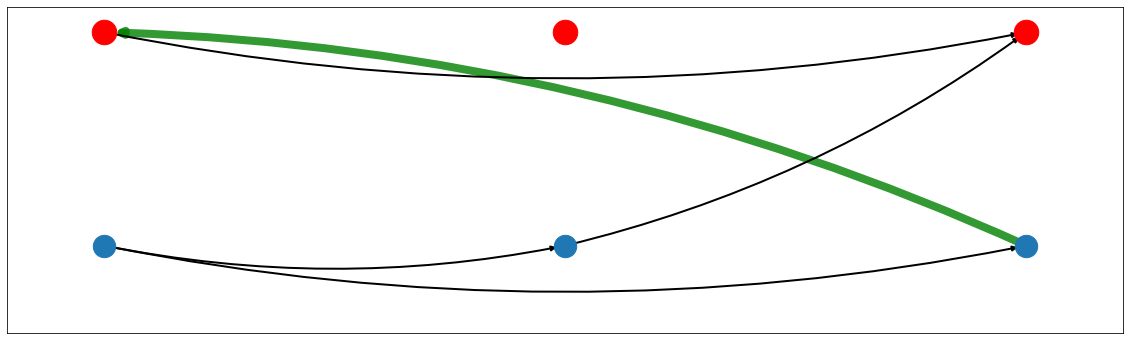

In [ ]:
def OrderedDraw(lot,bridges,charges,M):
  edgeList = getEdges(lot)
  edgeCopy = edgeList.copy()
  K = getVertices(lot)
  vertexCopy = K.copy()
  G = nx.MultiDiGraph()

  critVertices, critEdges = newGetCritValues(lot,bridges,charges)
  print(critEdges)
  print(edgeList)
  for edge in critEdges:
    if edge not in edgeCopy:
      flippedEdge = (edge[1],edge[0])
      edgeCopy.remove(flippedEdge)
    else:
      edgeCopy.remove(edge)
  for vertex in critVertices:
    vertexCopy.remove(vertex)

  pos = nx.spring_layout(G, scale=2, seed=80)
  x = 24
  for k in K:
	  pos[k] = [Ord(k,M), 0+random.randint(0,5*x)]
  fig, ax = plt.subplots(1, 1, figsize=(20, 6));
  nx.draw_networkx_nodes(G,pos,  nodelist=critVertices,node_color='r',with_labels=True,node_size=600,alpha=1)
  nx.draw_networkx_nodes(G,pos, nodelist=list(set(K)-set(critVertices)),with_labels=True,node_size=500,alpha=1)
  nx.draw_networkx_edges(G,pos,edgelist=critEdges,width=8, alpha=0.8, edge_color='g',connectionstyle='arc3, rad=.3')
  nx.draw_networkx_edges(G,pos,edgelist=edgeCopy,width=2, alpha=0.8, connectionstyle='arc3, rad=.3')

def linkSubgraphDraw(lot, edgeList, bridges, charges):
  edgeList = list(edgeList)
  vertexList = getVertices(lot)
  G = nx.MultiDiGraph()
  critVertices, critEdges = newGetCritValues(lot,bridges,charges)
  wholeLink = link(lot)
  subCritEdges = []
  print(edgeList)

  bigons = []
  #print(edgeList)
  for edge in edgeList:
    alteredList = edgeList.copy()
    alteredList.remove(edge)
    for edge2 in alteredList:
      if (edge[0], edge[1]) == (edge2[0], edge2[1]):
        flippedEdge = (edge[1], edge[0])
        bigons.append(flippedEdge)

  for critEdge in critEdges:
    for edge in edgeList:
      if (edge[0], edge[1]) == critEdge:
        edgeList.remove(edge)
        subCritEdges.append(critEdge)
        

      elif (edge[1], edge[0]) == critEdge:
        edgeList.remove(edge)
        subCritEdges.append(critEdge)
        

  # for edge in critEdges:
  #   if edge not in list(wholeLink.edges()):
  #     #print('gotcha')
  #     critEdges.remove(edge)
  #     flippedEdge = ((edge[1],edge[0]))
  #     critEdges.append(flippedEdge)

  # for edge in list(edgeList):
  #   if (edge[0], edge[1]) in critEdges:
  #     subCritEdges.append((edge[0], edge[1]))
  #     edgeList.remove(edge)

  pos = nx.spring_layout(G, scale=2, seed=80)
  for vertex in vertexList:
    if vertex[1] == inn:
      pos[vertex] = (vertex[0], 1)
    if vertex[1] == out:
      pos[vertex] = (vertex[0], -1)
  fig, ax = plt.subplots(1, 1, figsize=(20, 6));
  nx.draw_networkx_nodes(G, pos, nodelist=vertexList, node_size=500, alpha=1)
  nx.draw_networkx_nodes(G,pos, nodelist=critVertices,node_color='r',with_labels=True,node_size=600,alpha=1)
  nx.draw_networkx_edges(G,pos,edgelist=subCritEdges,width=8, alpha=0.8, edge_color='g',connectionstyle='arc3, rad=.1')
  nx.draw_networkx_edges(G, pos, edgelist=edgeList, width=2, alpha=1, connectionstyle='arc3, rad=.1')
  nx.draw_networkx_edges(G, pos, edgelist=bigons, width=2, alpha=1, connectionstyle='arc3, rad=.1')
  

lot = [[1,3,2],[2,1,3]]
#lot = [[1,4,2],[2,1,3],[3,2,4]]

K = getVertices(lot)
G = link(lot)
Subs = spurlessSubs(G)
edges = Subs[10]
linkSubgraphDraw(lot, edges, [N,N], [1,1,1])



# ***THIS IS WHERE WE PUT IT ALL TOGETHER***

In [ ]:
def WayOut(lot):                                                                #if each node n of S is either in V, or  (n,e) is in K and n,e are in S
  bridgeList = injectiveBridgeBuilder(lot)
  chargeList = chargeBuilder(lot)
  spurlessSubList = spurlessSubs(link(lot))
  print('the number of subgraphs is:', len(spurlessSubList))
  solutionList = []

  for bridgeChoice in bridgeList:
    for chargeChoice in chargeList:
      V, K = newGetCritValues(lot,bridgeChoice,chargeChoice)
      #V is the criticalVertexList,K is the CriticalEdgeList

      successFlag = False
      badSubgraph = False

      while (successFlag == False) and (badSubgraph == False):
        for subList in spurlessSubList:
          S = nx.MultiGraph()
          S.add_nodes_from(link(lot))
          S.add_weighted_edges_from(subList)
          S = removeZeroNodes(S)
          vertexOut = False
          noLuck = False
          while (vertexOut == False) and (noLuck == False):
            for n in list(S.nodes()):
              if n not in V:
                PotentialOut = n
                edgeBad = False
                for edge in K:
                  flippedEdge = (edge[1], edge[0])
                  if (edge[0] == n) and (edge in S.edges() or flippedEdge in S.edges()):
                    edgeBad = True

                if edgeBad == False:
                  vertexOut = True
                  #print('The way out is:', PotentialOut) #for following drawn graph
                  #DRAW THE subgraph routine begins:
                  #linkSubgraphDraw(lot, subList, bridgeChoice, chargeChoice)
                  #print(K)
                  #print(subList)
                  #plt.show()
                  #input('Enter')
                  # DRAW the subgraph routine ends
                  
            if vertexOut == False:
              badSubgraph = True
              noLuck = True

        if badSubgraph == False:
          solutionList.append([bridgeChoice, chargeChoice])
          print([bridgeChoice, chargeChoice])
          successFlag = True




      # if flag = True:
      #   solutionList.append(bridgeChoice, chargechoice)


  #print(len(solutionList))
  #print(solutionList)
  return solutionList
            

#lot = [[1,5,2],[2,1,3],[3,2,4],[4,1,5]]
#lot = [[1,4,2],[2,1,3],[3,5,4],[4,1,5]]   # This will always fail!

#lot = [[1,2,4],[2,3,4],[4,1,3]]
#lot = [[1,5,2],[2,4,3],[3,1,4],[4,2,5]]




#LOTS WITH BOUNDARY REDUCIBLE SUBLOTS (perhaps dont have GS):
#lot = [[1,3,2], [2,1,3], [1,2,4], [5,4,1]]


#lot = [[1,3,2],[2,1,3],[3,2,4]]

#lot = [[1,3,2],[2,1,3]]
#lot = [[1,3,2],[2,1,3], [1,2,4]]


# for i in spurlessSubs(link(lot)):
#   print(len(i), i)
#print(spurlessSubs(link(lot)))

#lot = [[1,5,2],[2,1,3],[3,2,4],[4,2,5]]

#lot = [[1,5,2],[2,5,3],[3,2,4],[4,2,5]]
#lot = [[1,5,2],[2,4,3],[3,6,4],[4,1,5], [5,2,6]]    #has 48 solutions...
#lot = [[1,5,2],[2,4,3],[4,6,3],[4,1,5], [5,3,6]]    #has 48 solutions...


lot = [[4,3,1],[4,2,3],[2,1,4]]

print(lot)
for solution in WayOut(lot):
  print(solution)

[[4, 3, 1], [4, 2, 3], [2, 1, 4]]
the number of subgraphs is: 171
[['N', 'N', 'N'], [-1, 1, -1, -1]]
[['N', 'N', 'N'], [-1, -1, -1, -1]]
[['N', 'N', 'S'], [1, 1, 1, -1]]
[['N', 'N', 'S'], [-1, -1, -1, 1]]
[['N', 'N', 'E'], [-1, 1, -1, -1]]
[['N', 'N', 'E'], [-1, -1, -1, 1]]
[['N', 'N', 'E'], [-1, -1, -1, -1]]
[['N', 'S', 'N'], [1, -1, 1, -1]]
[['N', 'S', 'N'], [-1, -1, 1, -1]]
[['N', 'S', 'S'], [-1, 1, -1, 1]]
[['N', 'S', 'E'], [-1, 1, -1, 1]]
[['N', 'S', 'E'], [-1, -1, 1, -1]]
[['N', 'W', 'N'], [-1, 1, -1, -1]]
[['N', 'W', 'S'], [1, 1, 1, -1]]
[['N', 'W', 'S'], [-1, 1, -1, 1]]
[['N', 'W', 'W'], [1, 1, 1, -1]]
[['S', 'N', 'S'], [1, 1, -1, -1]]
[['S', 'S', 'N'], [1, -1, 1, 1]]
[['S', 'S', 'S'], [1, 1, 1, 1]]
[['S', 'S', 'S'], [1, 1, -1, 1]]
[['S', 'S', 'S'], [-1, -1, 1, 1]]
[['S', 'S', 'E'], [-1, -1, 1, 1]]
[['S', 'W', 'S'], [1, 1, 1, 1]]
[['S', 'W', 'S'], [1, 1, -1, 1]]
[['S', 'W', 'S'], [1, 1, -1, -1]]
[['S', 'W', 'W'], [1, 1, 1, 1]]
[['S', 'W', 'W'], [1, 1, -1, 1]]
[['S', 'W', 'W'], 

In [ ]:
[[1, 5, 2], [2, 4, 3], [3, 6, 4], [4, 1, 5], [5, 2, 6]]
the number of subgraphs is: 10837


[['N', 'N', 'N', 'N', 'S'], [-1, -1, -1, 1, -1, 1]]
[['N', 'N', 'S', 'N', 'S'], [-1, -1, 1, 1, -1, 1]]
[['N', 'N', 'W', 'N', 'S'], [-1, -1, 1, 1, -1, 1]]
[['N', 'N', 'W', 'N', 'S'], [-1, -1, -1, 1, -1, 1]]
[['N', 'N', 'W', 'N', 'E'], [-1, -1, 1, 1, -1, 1]]
[['N', 'N', 'W', 'N', 'E'], [-1, -1, -1, 1, -1, 1]]
[['N', 'W', 'W', 'N', 'E'], [-1, -1, 1, 1, -1, 1]]
[['N', 'W', 'W', 'N', 'E'], [-1, -1, -1, 1, -1, 1]]
[['S', 'N', 'N', 'N', 'S'], [1, 1, -1, -1, 1, -1]]
[['S', 'S', 'N', 'N', 'S'], [1, 1, 1, -1, 1, -1]]
[['S', 'E', 'N', 'N', 'S'], [1, 1, 1, -1, 1, -1]]
[['S', 'E', 'N', 'N', 'S'], [1, 1, -1, -1, 1, -1]]
[['S', 'E', 'N', 'W', 'S'], [1, 1, 1, -1, 1, -1]]
[['S', 'E', 'N', 'W', 'S'], [1, 1, -1, -1, 1, -1]]
[['S', 'E', 'E', 'N', 'S'], [1, 1, 1, -1, 1, -1]]
[['S', 'E', 'E', 'N', 'S'], [1, 1, -1, -1, 1, -1]]
[['E', 'N', 'W', 'N', 'E'], [-1, -1, 1, 1, -1, 1]]
[['E', 'N', 'W', 'N', 'E'], [-1, -1, -1, 1, -1, 1]]
[['E', 'N', 'W', 'E', 'E'], [-1, -1, 1, 1, -1, 1]]
[['E', 'N', 'W', 'E', 'E'], [-1, -1, -1, 1, -1, 1]]
[['W', 'E', 'N', 'W', 'S'], [1, 1, 1, -1, 1, -1]]
[['W', 'E', 'N', 'W', 'S'], [1, 1, -1, -1, 1, -1]]
[['W', 'E', 'N', 'W', 'W'], [1, 1, 1, -1, 1, -1]]
[['W', 'E', 'N', 'W', 'W'], [1, 1, -1, -1, 1, -1]]
[['N', 'N', 'N', 'N', 'S'], [-1, -1, -1, 1, -1, 1]]
[['N', 'N', 'S', 'N', 'S'], [-1, -1, 1, 1, -1, 1]]
[['N', 'N', 'W', 'N', 'S'], [-1, -1, 1, 1, -1, 1]]
[['N', 'N', 'W', 'N', 'S'], [-1, -1, -1, 1, -1, 1]]
[['N', 'N', 'W', 'N', 'E'], [-1, -1, 1, 1, -1, 1]]
[['N', 'N', 'W', 'N', 'E'], [-1, -1, -1, 1, -1, 1]]
[['N', 'W', 'W', 'N', 'E'], [-1, -1, 1, 1, -1, 1]]
[['N', 'W', 'W', 'N', 'E'], [-1, -1, -1, 1, -1, 1]]
[['S', 'N', 'N', 'N', 'S'], [1, 1, -1, -1, 1, -1]]
[['S', 'S', 'N', 'N', 'S'], [1, 1, 1, -1, 1, -1]]
[['S', 'E', 'N', 'N', 'S'], [1, 1, 1, -1, 1, -1]]
[['S', 'E', 'N', 'N', 'S'], [1, 1, -1, -1, 1, -1]]
[['S', 'E', 'N', 'W', 'S'], [1, 1, 1, -1, 1, -1]]
[['S', 'E', 'N', 'W', 'S'], [1, 1, -1, -1, 1, -1]]
[['S', 'E', 'E', 'N', 'S'], [1, 1, 1, -1, 1, -1]]
[['S', 'E', 'E', 'N', 'S'], [1, 1, -1, -1, 1, -1]]
[['E', 'N', 'W', 'N', 'E'], [-1, -1, 1, 1, -1, 1]]
[['E', 'N', 'W', 'N', 'E'], [-1, -1, -1, 1, -1, 1]]
[['E', 'N', 'W', 'E', 'E'], [-1, -1, 1, 1, -1, 1]]
[['E', 'N', 'W', 'E', 'E'], [-1, -1, -1, 1, -1, 1]]
[['W', 'E', 'N', 'W', 'S'], [1, 1, 1, -1, 1, -1]]
[['W', 'E', 'N', 'W', 'S'], [1, 1, -1, -1, 1, -1]]
[['W', 'E', 'N', 'W', 'W'], [1, 1, 1, -1, 1, -1]]
[['W', 'E', 'N', 'W', 'W'], [1, 1, -1, -1, 1, -1]]

In [ ]:
def WayOutSpecific(lot,TheBridge,TheCharge,PrintAll):                                                                #if each node n of S is either in V, or  (n,e) is in K and n,e are in S
  bridgeList = [TheBridge]
  chargeList = [TheCharge]
  spurlessSubList = spurlessSubs(link(lot))
  #print(spurlessSubList)
  solutionList = []

  for bridgeChoice in bridgeList:
    for chargeChoice in chargeList:
      V, K = newGetCritValues(lot,bridgeChoice,chargeChoice)
      #V is the criticalVertexList,K is the CriticalEdgeList

      successFlag = False
      badSubgraph = False
      if PrintAll==False:
        #DRAW THE subgraph routine begins:
        subList=spurlessSubList[0]
        linkSubgraphDraw(lot, subList, bridgeChoice, chargeChoice)
        plt.show()
      if PrintAll==True:
        while (successFlag == False) and (badSubgraph == False):
          for subList in spurlessSubList:
            S = nx.MultiGraph()
            S.add_nodes_from(link(lot))
            S.add_weighted_edges_from(subList)
            S = removeZeroNodes(S)
            vertexOut = False
            noLuck = False
            #print('there are supposedly', len(subList), 'edges')
            #linkSubgraphDraw(lot, subList, bridgeChoice, chargeChoice)
            #plt.show()
            while (vertexOut == False) and (noLuck == False):
              AllWaysOut=[]
              for n in list(S.nodes()):
                if n not in V:
                  edgeBad = False
                  for edge in K:
                    flippedEdge = (edge[1], edge[0])
                    if (edge[0] == n) and (edge in S.edges() or flippedEdge in S.edges()):
                      edgeBad = True

                  if edgeBad == False:
                    vertexOut = True
                    AllWaysOut.append(n)

              if vertexOut == False:
                badSubgraph = True
                noLuck = True
              print('The ways out are:', AllWaysOut, 'for following subgraph') 
              linkSubgraphDraw(lot, subList, bridgeChoice, chargeChoice)
              plt.show()
              #print(K)
              #print(subList)
              #input('Enter')
              # DRAW the subgraph routine ends


          if badSubgraph == False:
            solutionList.append([bridgeChoice, chargeChoice])
            successFlag = True




      # if flag = True:
      #   solutionList.append(bridgeChoice, chargechoice)


  #print(len(solutionList))
  #print(solutionList)
  return solutionList
            

#lot = [[1,5,2],[2,1,3],[3,2,4],[4,1,5]] #has 40 solutions. all tree-complementary
#lot = [[1,4,2],[2,1,3],[3,5,4],[4,1,5]]   # This will always fail!
#lot = [[1,4,2],[2,1,3],[3,5,4],[5,1,4]]   # This variant has 40 solutions... 
#lot = [[1,5,2],[2,1,3],[3,5,4],[5,1,4]]   # Claims no solutions!
#lot = [[1,5,2],[2,1,3],[3,5,4],[4,1,5]]   # Has 80 solutions!
#lot = [[1,5,2],[2,1,3],[3,5,4],[4,2,5]]   # Has 0 solutions!
#lot = [[1,5,2],[2,1,3],[3,2,4],[4,2,5]]   # Has 32 solutions!
#lot = [[1,5,2],[2,1,3],[3,2,4],[5,1,4]]   # Has 0 solutions!
#lot = [[1,5,2],[2,1,3],[3,2,4],[4,1,5]]   # Has 0 solutions!
#lot = [[1,5,2],[2,1,3],[3,1,4],[4,1,5]]   # Has 80 solutions!
#lot = [[1,5,2],[2,1,3],[4,1,2],[4,3,5]]   # Has 80 solutions!

#lot = [[1,2,4],[2,3,4],[4,1,3]]
#
#lot = [[1,5,2],[2,4,3],[3,1,4],[4,2,5]]  # Wayout gives 20 solutions, as follows:
#[[['S', 'N', 'N', 'N'], [-1, 1, -1, -1, -1]], [['S', 'N', 'N', 'S'], [1, -1, -1, 1, 1]], [['S', 'N', 'S', 'S'], [1, -1, 1, 1, 1]], [['S', 'N', 'W', 'S'], [1, -1, 1, 1, 1]], [['S', 'N', 'W', 'S'], [1, -1, -1, 1, 1]], [['S', 'S', 'N', 'N'], [-1, 1, 1, -1, -1]], [['S', 'E', 'N', 'N'], [-1, 1, 1, -1, -1]], [['S', 'E', 'N', 'N'], [-1, 1, -1, -1, -1]], [['S', 'E', 'N', 'W'], [-1, 1, 1, -1, -1]], [['S', 'E', 'N', 'W'], [-1, 1, -1, -1, -1]], [['S', 'E', 'E', 'N'], [-1, 1, 1, -1, -1]], [['S', 'E', 'E', 'N'], [-1, 1, -1, -1, -1]], [['E', 'E', 'N', 'W'], [-1, 1, 1, -1, -1]], [['E', 'E', 'N', 'W'], [-1, 1, -1, -1, -1]], [['W', 'N', 'W', 'S'], [1, -1, 1, 1, 1]], [['W', 'N', 'W', 'S'], [1, -1, -1, 1, 1]], [['W', 'N', 'W', 'E'], [1, -1, 1, 1, 1]], [['W', 'N', 'W', 'E'], [1, -1, -1, 1, 1]], [['W', 'W', 'W', 'E'], [1, -1, 1, 1, 1]], [['W', 'W', 'W', 'E'], [1, -1, -1, 1, 1]]]

#lot = [[1,4,2],[2,1,3],[3,5,4],[5,1,4]]   # This should be amusing...



#LOTS WITH BOUNDARY REDUCIBLE SUBLOTS (Following one might not have  GS):
#lot = [[1,3,2], [2,1,3], [1,2,4], [5,4,1]]  #this fails the  "wayout" test ...!


lot = [[1,3,2],[2,1,3],[3,2,4]] #### has 12 solutions to Wayout test.

#lot = [[1,3,2],[2,1,3]]
#lot = [[1,3,2],[2,1,3], [1,2,4]]


#for i in spurlessSubs(link(lot)):  
#  print(len(i), i)
#print(spurlessSubs(link(lot)))

#WayOutSpecific(lot,['N', 'N', 'N', 'W'], [1, 1, 1, -1, 1])

#SolutionSet = [[['N', 'N'], [-1, -1, -1]], [['S', 'N'], [1, -1, 1]], [['S', 'N'], [-1, 1, -1]], [['S', 'S'], [1, 1, 1]], [['S', 'W'], [1, 1, 1]], [['S', 'W'], [1, -1, 1]], [['E', 'N'], [-1, 1, -1]], [['E', 'N'], [-1, -1, -1]], [['E', 'E'], [-1, 1, -1]], [['E', 'E'], [-1, -1, -1]], [['W', 'W'], [1, 1, 1]], [['W', 'W'], [1, -1, 1]]]
#SolutionSet= [[['S', 'N', 'N', 'N'], [-1, 1, -1, -1, -1]], [['S', 'N', 'N', 'S'], [1, -1, -1, 1, 1]], [['S', 'N', 'S', 'S'], [1, -1, 1, 1, 1]], [['S', 'N', 'W', 'S'], [1, -1, 1, 1, 1]], [['S', 'N', 'W', 'S'], [1, -1, -1, 1, 1]], [['S', 'S', 'N', 'N'], [-1, 1, 1, -1, -1]], [['S', 'E', 'N', 'N'], [-1, 1, 1, -1, -1]], [['S', 'E', 'N', 'N'], [-1, 1, -1, -1, -1]], [['S', 'E', 'N', 'W'], [-1, 1, 1, -1, -1]], [['S', 'E', 'N', 'W'], [-1, 1, -1, -1, -1]], [['S', 'E', 'E', 'N'], [-1, 1, 1, -1, -1]], [['S', 'E', 'E', 'N'], [-1, 1, -1, -1, -1]], [['E', 'E', 'N', 'W'], [-1, 1, 1, -1, -1]], [['E', 'E', 'N', 'W'], [-1, 1, -1, -1, -1]], [['W', 'N', 'W', 'S'], [1, -1, 1, 1, 1]], [['W', 'N', 'W', 'S'], [1, -1, -1, 1, 1]], [['W', 'N', 'W', 'E'], [1, -1, 1, 1, 1]], [['W', 'N', 'W', 'E'], [1, -1, -1, 1, 1]], [['W', 'W', 'W', 'E'], [1, -1, 1, 1, 1]], [['W', 'W', 'W', 'E'], [1, -1, -1, 1, 1]]]

SolutionSet = WayOut(lot)
print (lot, "has", len(SolutionSet), "solutions")
print (SolutionSet)

for k in SolutionSet:
  print(k)
  #print(subList)
  plt.show()
  WayOutSpecific(lot,k[0],k[1],PrintAll=False)
  #input('Enter')


In [ ]:
#List of solutions from other code for LOT = [[1,3,2],[2,1,3]]

#trivial charges
#[['W', 'W'], [1, 1, 1], ((3, 'out'), (1, 'out'), (2, 'out'), (3, 'inn'), (1, 'inn'), (2, 'inn')), [[1, 3, 2], [2, 1, 3]]]
#[['W', 'W'], [1, 1, 1], ((3, 'out'), (1, 'out'), (3, 'inn'), (1, 'inn'), (2, 'out'), (2, 'inn')), [[1, 3, 2], [2, 1, 3]]]

#other ones
#[['E', 'E'], [-1, -1, -1], ((1, 'inn'), (3, 'inn'), (1, 'out'), (2, 'out'), (2, 'inn'), (3, 'out')), [[1, 3, 2], [2, 1, 3]]]
#[['E', 'E'], [-1, 1, -1], ((1, 'inn'), (3, 'inn'), (1, 'out'), (2, 'out'), (3, 'out'), (2, 'inn')), [[1, 3, 2], [2, 1, 3]]]

#seems like all these options appear as successes of the wayout

In [ ]:
#OLD CODE

# def WayOut(lot):                                                                #if each node n of S is either in V, or  (n,e) is in K and n,e are in S
#   bridgeList = injectiveBridgeBuilder(lot)
#   chargeList = chargeBuilder(lot)
#   spurlessSubList = spurlessSubs(link(lot))
#   solutionList = []
#   #print(len(chargeList),len(bridgeList))
#   #print(bridgeList)
#   # print(len(spurlessSubList))

#   for bridgeChoice in bridgeList:
#     for chargeChoice in chargeList:
#       V, K = newGetCritValues(lot,bridgeChoice,chargeChoice)
#       #V is the criticalVertexList,K is the CriticalEdgeList

#     # for edge in K:
#     #   if edge not in list(G.edges()):
#     #     #print('here!')
#     #     K.remove(edge)
#     #     newEdge = (edge[1], edge[0])
#     #     K.append(newEdge)

#       globalFlag = True
#       for subList in spurlessSubList:
#         # print('Line 15')
#         S = nx.MultiGraph()
#         S.add_nodes_from(link(lot))
#         S.add_weighted_edges_from(subList)
#         S = removeZeroNodes(S)
#         #print(S.edges())

#         flag = False
#         for n in list(S.nodes()):
#           if n not in V:
#             flag = True
#             for edge in K:
#               #print(edge)
#               flippedEdge = (edge[1], edge[0])
#               #print(flippedEdge)
#               if (edge[0] == n) and (edge in S.edges() or flippedEdge in S.edges()):
#                 # print('wow')
#                 flag = False
#             # if flag:
#             #   T = nx.MultiGraph()                #what is T here?
#             #   T.add_nodes_from(link(lot))
#             #   T.add_weighted_edges_from(subList)
#             # else:
#             #   linkSubgraphDraw(lot, subList, bridgeChoice, chargeChoice)
#             #   plt.show()
#             #   print(n)
#             #   input('Press ENTER to continue...')

#         if flag == False:
#           globalFlag = False

#         S = nx.MultiGraph()
#         S.add_nodes_from(link(lot))
#         S.add_weighted_edges_from(subList)
          
#       if globalFlag:
#         solutionList.append([bridgeChoice, chargeChoice, V])
#         print(bridgeChoice)
#         print(chargeChoice)
#         for subList in spurlessSubList:
#           print(K)
#           print(subList)
#           linkSubgraphDraw(lot, subList, bridgeChoice, chargeChoice)
#           plt.show()
#           input('Enter')
#   print(len(solutionList))
#   for item in solutionList:
#     print(item)


# #lot = [[1,3,2], [2,1,3], [1,2,4], [5,4,1]]
# #lot = [[1,5,2],[2,1,3],[3,2,4],[4,1,5]]
# #lot = [[1,2,4],[2,3,4],[4,1,3]]
# lot = [[1,3,2],[2,1,3]]

# WayOut(lot)

In [ ]:
#OLD CODE

# def WayOutInput(lot, bridge, charge):                                                                #if each node n of S is either in V, or  (n,e) is in K and n,e are in S
#   spurlessSubList = spurlessSubs(link(lot))
#   solutionList = []
#   G = link(lot)

#   V, K = newGetCritValues(lot,bridge,charge)
#   critEdgeCopy = K.copy()
#   print(K)
#   #print(K)
    
#   #V is the criticalVertexList,K is the CriticalEdgeList

#   globalFlag = True
#   for subList in spurlessSubList:
#     S = nx.MultiGraph()
#     S.add_nodes_from(link(lot))
#     S.add_weighted_edges_from(subList)
#     S = removeZeroNodes(S)

#     flag = False
#     while flag == False:

#     for n in list(S.nodes()):
#       if n not in V:
#         for edge in K:
#           flippedEdge = (edge[1], edge[0])
#           if (edge[0] == n) and (edge in S.edges() or flippedEdge in S.edges()):
#             print('wayout vertex', n)
#             linkSubgraphDraw(lot, subList, bridge, charge)
#             plt.show()
#             input('Enter to continue')
#             flag = False
#         # if flag:
#         #   T = nx.MultiGraph()                #what is T here?
#         #   T.add_nodes_from(link(lot))
#         #   T.add_weighted_edges_from(subList)
#         # else:
#         #   linkSubgraphDraw(lot, subList, bridgeChoice, chargeChoice)
#         #   plt.show()
#         #   print(n)
#         #   input('Press ENTER to continue...')

#     if flag == False:
#       globalFlag = False

#     S = nx.MultiGraph()
#     S.add_nodes_from(link(lot))
#     S.add_weighted_edges_from(subList)
        
#   if globalFlag:
#     solutionList.append([bridge, charge, V])
#   #print(len(solutionList))
#   #for item in solutionList:
#     #print(item)



# lot = [[1,3,2],[2,1,3]]
# bridge = [W,W]
# charge = [1,1,1]
# WayOutInput(lot, bridge, charge)

In [ ]:
# G = nx.complete_graph(5)
# G.add_node(6)
# G.add_edge(5,6)



# G = nx.MultiGraph()
# G.add_nodes_from([1,2,3,4])
# G.add_edges_from([(1,2),(1,2),(1,3),(2,4),(3,4),(3,4)])

#lot = [[1,3,2],[2,1,3]]
lot = [[1,3,2],[2,1,3]]
G = link(lot)

print(len(spurlessSubs(G)))
#x = spurlessSubs(G)
# print(len(x))

# J = nx.MultiGraph()
# J.add_nodes_from([1,2,3,4,5,6])
# J.add_edges_from([(1,6),(1,6),(3,5),(3,5),(4,5),(4,6),(5,6),(1,3),(2,3),(4,2)])

#NX CONNECTED_COMPONENT_SUBGRAPHS IS NO LONGER IN NX VERSION 2.4

#NX CONNECTED_COMPONENTS DOESNT COPY EDGE INFORMATION LIKE ~WEIGHTS!~


# graphs = list(nx.connected_component_subgraphs(G))
# print(graphs)


# charge = [1,1,1,1]
# bridge =[N,N,N]
# for subList in x:
#   print(subList)
#   linkSubgraphDraw(lot, subList, bridge, charge)
#   plt.show()
#   input('enter to continue')


In [ ]:
lot = [[1,3,2],[2,1,3],[3,2,4]]
bridge = ['S', 'N', 'E']
charge = [-1, 1, -1, 1]

for subList in spurlessSubs(link(lot)):
  linkSubgraphDraw(lot, subList, bridge, charge)
  plt.show()
  input('enter to conintue')